In [256]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor


from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import pickle

import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")

In [257]:
df = pd.read_csv("avocado.csv")

In [258]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [259]:
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [260]:
df.shape

(18249, 14)

In [261]:
df.isna().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [262]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [263]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.shape

(18249, 13)

In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [265]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [266]:
df.nunique()

Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

In [267]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
dtype: float64

As we can see that some of columns are highly skewed let us proceed with it later we will treat as per requirement

In [268]:
df['Year'],df['month'],df['day']=df['Date'].str.split('-').str

We have split column 'Date' into three new column namely Year,month,day.

In [269]:
df['Year']=df['Year'].astype(int)
df['month']=df['month'].astype(int)
df['day']=df['day'].astype(int)

In [270]:
df.drop(['year','Date'],axis=1,inplace=True)
df.shape

(18249, 14)

## Let's start visualizing the data now

conventional    9126
organic         9123
Name: type, dtype: int64


<AxesSubplot:xlabel='type', ylabel='count'>

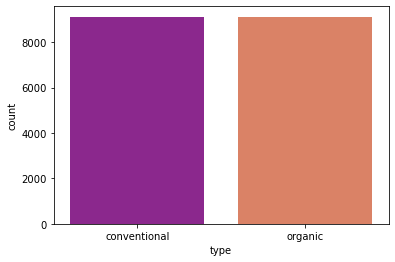

In [271]:
print(df['type'].value_counts())
sns.countplot(x='type',data=df,palette='plasma')

2017    5722
2016    5616
2015    5615
2018    1296
Name: Year, dtype: int64


<AxesSubplot:xlabel='Year', ylabel='count'>

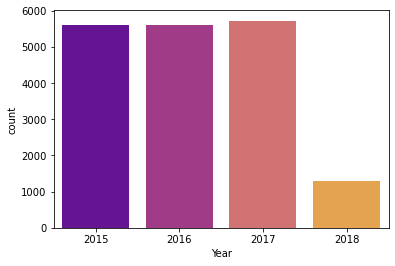

In [272]:
print(df['Year'].value_counts())
sns.countplot(x='Year',data=df,palette='plasma')

1     1944
3     1836
2     1728
10    1512
7     1512
5     1512
11    1404
8     1404
4     1404
12    1403
9     1296
6     1294
Name: month, dtype: int64


<AxesSubplot:xlabel='month', ylabel='count'>

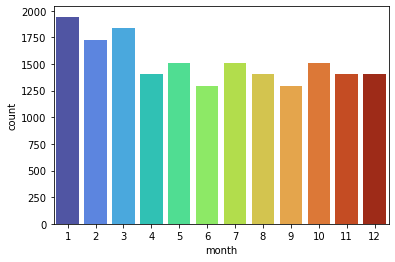

In [273]:
print(df['month'].value_counts())
sns.countplot(x='month',data=df,palette='turbo')

4     756
11    756
18    755
25    755
1     648
26    648
5     648
12    648
3     648
8     648
15    648
22    648
24    648
17    648
10    648
19    648
7     540
14    540
21    540
28    540
27    540
20    540
29    540
13    540
6     539
2     432
9     432
23    432
30    432
31    432
16    432
Name: day, dtype: int64


<AxesSubplot:xlabel='day', ylabel='count'>

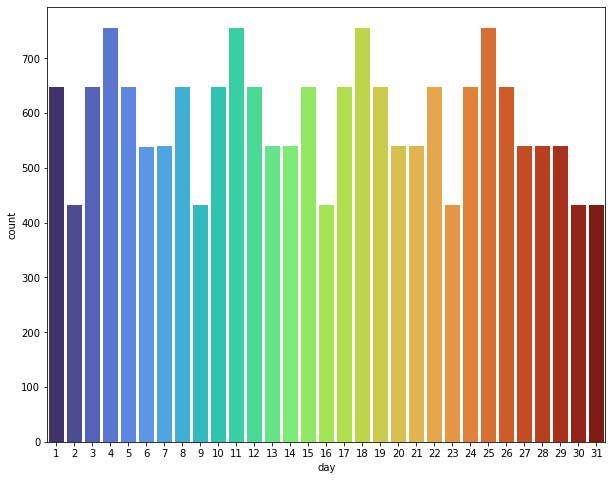

In [274]:
print(df['day'].value_counts())
plt.figure(figsize=(10,8))
sns.countplot(x='day',data=df,palette='turbo')

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

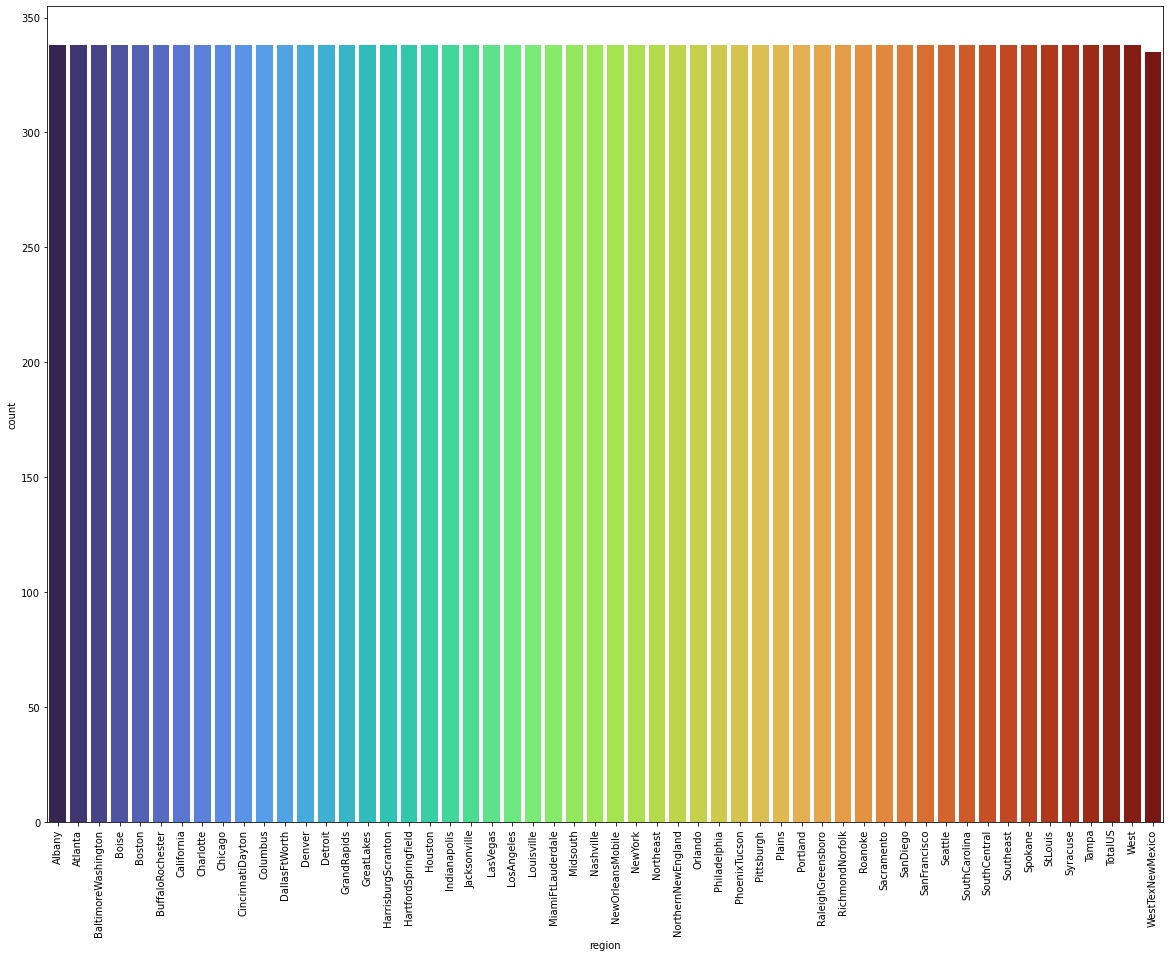

In [275]:
print(df['region'].value_counts())
plt.figure(figsize=(20,15))
sns.countplot(x='region',data=df,palette='turbo')
plt.xticks(rotation=90)
plt.show()

<Figure size 1080x720 with 0 Axes>

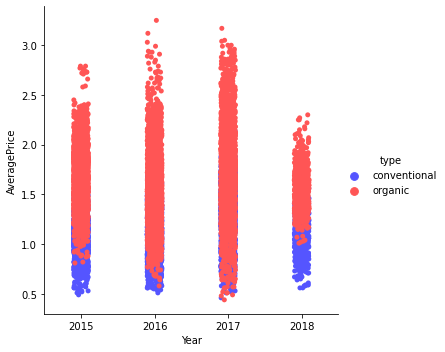

In [276]:
plt.figure(figsize=(15,10))
sns.catplot(x="Year", y="AveragePrice", hue="type", data=df, palette="seismic")
plt.show()

<Figure size 1080x720 with 0 Axes>

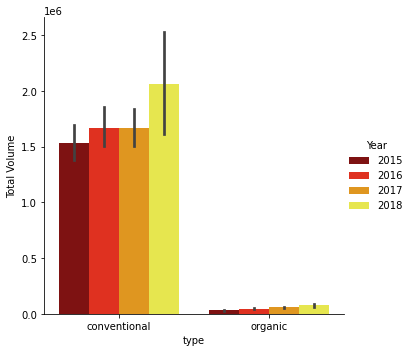

In [277]:
plt.figure(figsize=(15,10))
sns.catplot(x="type", y="Total Volume", hue="Year", kind="bar", data=df, palette="hot")
plt.show()

<Figure size 1080x720 with 0 Axes>

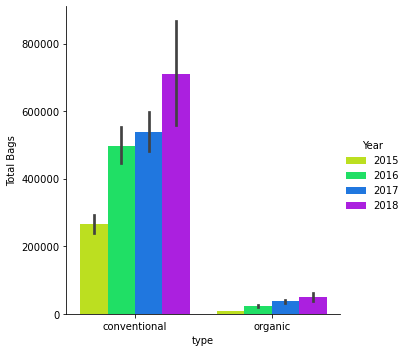

In [278]:
plt.figure(figsize=(15,10))
sns.catplot(x="type", y="Total Bags", hue="Year", data=df, kind="bar", palette="hsv")
plt.show()

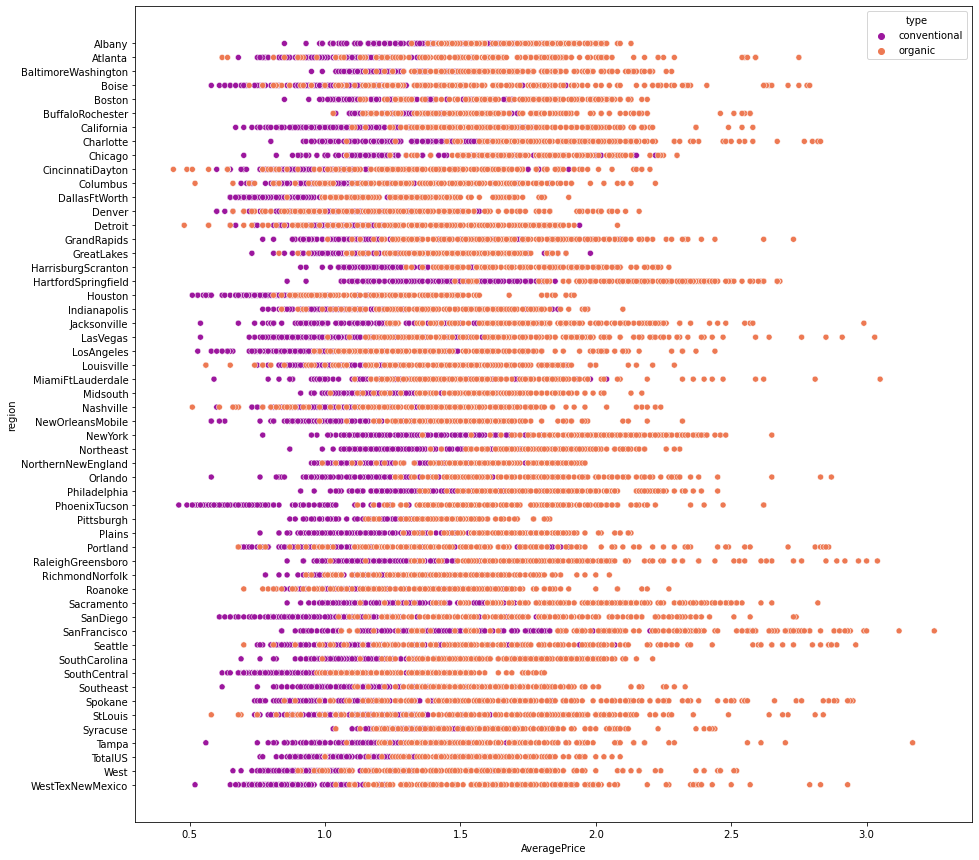

In [279]:
plt.figure(figsize=(15,15))
sns.scatterplot(x='AveragePrice', y='region', hue='type', data=df, palette="plasma")
plt.show()

By the help of this scatterplot we can say that the Average Price of every Region of organic type is always higher than that of conventional.

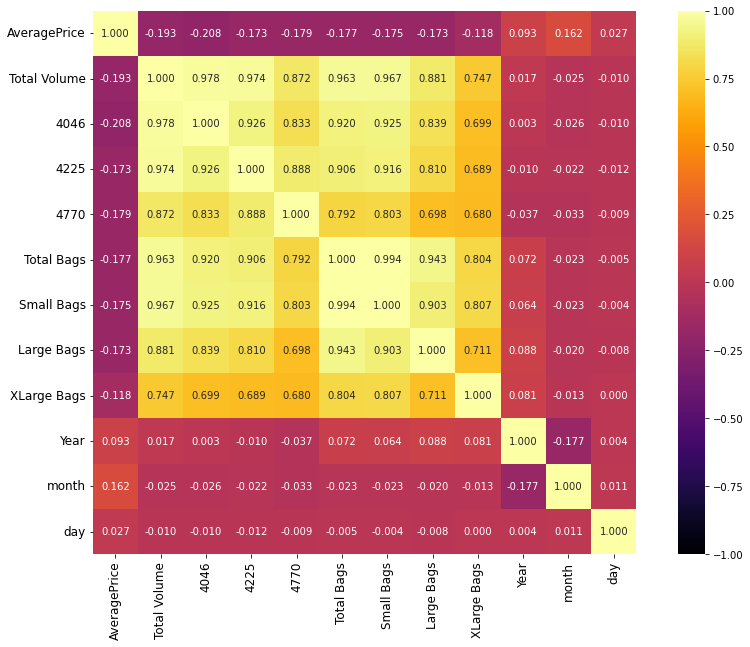

In [280]:
upper_triangle = np.triu(df.corr())
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="inferno")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

As heatmap of correlation of our dataset df is displaying that many of columns are highly correleted to each other means columns like, 4046,4225,4770 are highly correlated with Total Volume in this case we have to drop these columns ,similarly small Bags,Large Bags and Xlarge Bags are highly correleted with Totla Bags these columns also needs to be dropped in order to secure from multicollearnity problems

In [281]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,month,day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,2015,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,WestTexNewMexico,2018,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,WestTexNewMexico,2018,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,WestTexNewMexico,2018,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,WestTexNewMexico,2018,1,14


In [282]:
# summary of statstics
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,Year,month,day
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.177215,15.662612
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.534130,8.776281
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000,8.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000,16.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,9.000000,23.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000,31.000000


In [283]:
# Exploring the data variable
df.AveragePrice.unique()

array([1.33, 1.35, 0.93, 1.08, 1.28, 1.26, 0.99, 0.98, 1.02, 1.07, 1.12,
       1.31, 1.11, 1.34, 1.45, 1.05, 1.37, 1.27, 1.32, 1.23, 1.19, 1.43,
       1.2 , 1.22, 1.13, 1.16, 1.06, 1.17, 1.24, 0.96, 1.  , 1.09, 0.95,
       0.97, 1.15, 1.01, 1.14, 1.1 , 1.04, 1.03, 1.18, 1.29, 1.25, 0.71,
       0.94, 0.91, 1.39, 1.4 , 1.36, 1.3 , 1.54, 1.59, 1.56, 1.38, 1.49,
       1.5 , 1.47, 1.42, 1.41, 1.44, 1.52, 0.9 , 0.87, 0.78, 0.92, 0.83,
       0.88, 0.84, 0.85, 1.21, 0.79, 0.89, 0.86, 0.8 , 0.82, 0.74, 0.81,
       0.77, 0.75, 0.65, 0.73, 0.68, 0.72, 0.67, 0.76, 0.62, 0.7 , 0.66,
       1.46, 0.49, 0.53, 0.56, 0.6 , 0.58, 0.54, 0.52, 0.51, 0.57, 0.63,
       0.64, 0.61, 1.48, 1.55, 1.58, 1.53, 1.57, 1.51, 0.69, 1.62, 1.63,
       1.61, 1.6 , 1.73, 1.8 , 1.86, 1.85, 1.69, 1.66, 1.65, 1.64, 1.67,
       1.68, 1.82, 2.07, 1.84, 1.83, 1.7 , 1.72, 1.81, 1.78, 0.59, 1.9 ,
       1.93, 1.99, 1.95, 1.89, 1.76, 1.71, 1.74, 0.55, 1.79, 1.75, 1.94,
       2.2 , 1.87, 1.77, 2.06, 2.11, 2.22, 2.14, 2.

In [284]:
df.AveragePrice.value_counts()

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64

<AxesSubplot:>

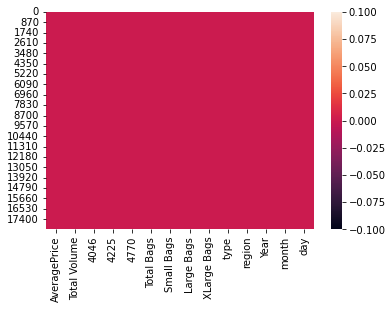

In [285]:
# Data Visualization to cheak the missing values
sns.heatmap(df.isnull())

In [286]:
# To check the correlation
dfcor=df.corr()
dfcor

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,Year,month,day
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197,0.162409,0.027386
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193,-0.024689,-0.009747
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353,-0.025803,-0.010159
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559,-0.022108,-0.012393
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531,-0.033424,-0.009009
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552,-0.022724,-0.004988
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915,-0.023126,-0.003870
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891,-0.020187,-0.008352
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033,-0.012969,0.000319
Year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000,-0.177050,0.004475


<AxesSubplot:>

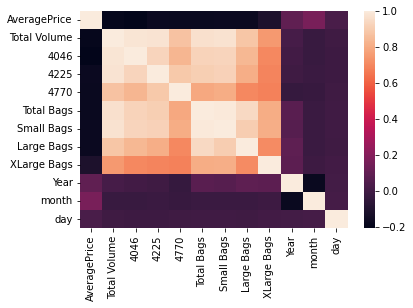

In [287]:
sns.heatmap(dfcor)

In [288]:
df.shape

(18249, 14)

In [289]:
df['AveragePrice'].mean()

1.4059784097758825

In [290]:
# What is the minimum Price of Avocado
df['AveragePrice'].min()

0.44

In [291]:
# What is the maximum Price of Avocado
df['AveragePrice'].max()

3.25

In [292]:
#Find maximum no of Avacados are sold
df['Total Volume'].max()

62505646.52

In [293]:
#How many people made the purchase
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [294]:
#Is there a correlation between Total bags and Total volume
df[['Total Volume','Total Bags']].corr()

,Total Volume,Total Bags
Total Volume,1.000000,0.963047
Total Bags,0.963047,1.000000


In [295]:
#Find Avg Price of Avocado in the different region in last 2 years
df.groupby('region')['AveragePrice'].mean()

region
Albany                 1.561036
Atlanta                1.337959
BaltimoreWashington    1.534231
Boise                  1.348136
Boston                 1.530888
BuffaloRochester       1.516834
California             1.395325
Charlotte              1.606036
Chicago                1.556775
CincinnatiDayton       1.209201
Columbus               1.252781
DallasFtWorth          1.085592
Denver                 1.218580
Detroit                1.276095
GrandRapids            1.505000
GreatLakes             1.338550
HarrisburgScranton     1.513284
HartfordSpringfield    1.818639
Houston                1.047929
Indianapolis           1.313994
Jacksonville           1.510947
LasVegas               1.380917
LosAngeles             1.216006
Louisville             1.286686
MiamiFtLauderdale      1.428491
Midsouth               1.404763
Nashville              1.212101
NewOrleansMobile       1.304793
NewYork                1.727574
Northeast              1.601923
NorthernNewEngland     1.477396
O

In [296]:
df[df['AveragePrice'] > df['AveragePrice'].mean()][['AveragePrice','Year','region']]

,AveragePrice,Year,region
21,1.45,2015,Albany
32,1.43,2015,Albany
274,1.54,2015,BuffaloRochester
275,1.59,2015,BuffaloRochester
276,1.56,2015,BuffaloRochester
...,...,...,...
18244,1.63,2018,WestTexNewMexico
18245,1.71,2018,WestTexNewMexico
18246,1.87,2018,WestTexNewMexico
18247,1.93,2018,WestTexNewMexico


In [297]:
#Find sales by regions
df.groupby('region')['Total Volume'].mean().sort_values()

region
Syracuse               3.237476e+04
Boise                  4.264257e+04
Spokane                4.605111e+04
Albany                 4.753787e+04
Louisville             4.762427e+04
Pittsburgh             5.564008e+04
BuffaloRochester       6.793630e+04
Roanoke                7.408879e+04
Jacksonville           8.517753e+04
Columbus               8.873776e+04
GrandRapids            8.938383e+04
Indianapolis           8.953666e+04
StLouis                9.489004e+04
Charlotte              1.051939e+05
Nashville              1.053612e+05
HarrisburgScranton     1.236948e+05
RichmondNorfolk        1.249433e+05
CincinnatiDayton       1.317219e+05
NewOrleansMobile       1.351927e+05
RaleighGreensboro      1.426116e+05
HartfordSpringfield    1.499128e+05
LasVegas               1.608784e+05
Orlando                1.735524e+05
SouthCarolina          1.797449e+05
Detroit                1.876403e+05
Tampa                  1.952797e+05
NorthernNewEngland     2.116358e+05
Philadelphia         

In [298]:
#Find the total no of sales in each year
df.groupby('Year')['Total Volume'].count()

Year
2015    5615
2016    5616
2017    5722
2018    1296
Name: Total Volume, dtype: int64

In [299]:
# correlation
df[['4046','4770','4225','Small Bags','Large Bags','XLarge Bags','Total Volume','Total Bags']].corr()

,4046,4770,4225,Small Bags,Large Bags,XLarge Bags,Total Volume,Total Bags
4046,1.000000,0.833389,0.926110,0.925280,0.838645,0.699377,0.977863,0.920057
4770,0.833389,1.000000,0.887855,0.802733,0.698471,0.679861,0.872202,0.792314
4225,0.926110,0.887855,1.000000,0.916031,0.810015,0.688809,0.974181,0.905787
Small Bags,0.925280,0.802733,0.916031,1.000000,0.902589,0.806845,0.967238,0.994335
Large Bags,0.838645,0.698471,0.810015,0.902589,1.000000,0.710858,0.880640,0.943009
XLarge Bags,0.699377,0.679861,0.688809,0.806845,0.710858,1.000000,0.747157,0.804233
Total Volume,0.977863,0.872202,0.974181,0.967238,0.880640,0.747157,1.000000,0.963047
Total Bags,0.920057,0.792314,0.905787,0.994335,0.943009,0.804233,0.963047,1.000000


In [300]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,month,day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,2015,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,WestTexNewMexico,2018,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,WestTexNewMexico,2018,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,WestTexNewMexico,2018,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,WestTexNewMexico,2018,1,14


<AxesSubplot:xlabel='4225'>

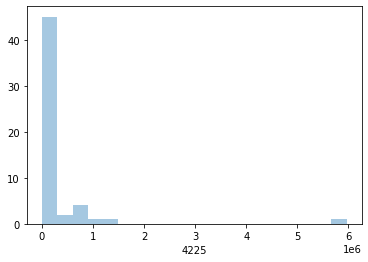

In [301]:
#Average sales of PLU 4225 by region.
sns.distplot(df.groupby('region')['4225'].mean(),bins=20, kde=False)


<AxesSubplot:xlabel='4046'>

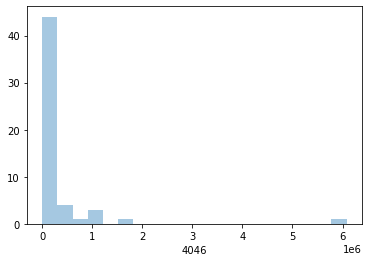

In [302]:
sns.distplot(df.groupby('region')['4046'].mean(),bins=20, kde=False)

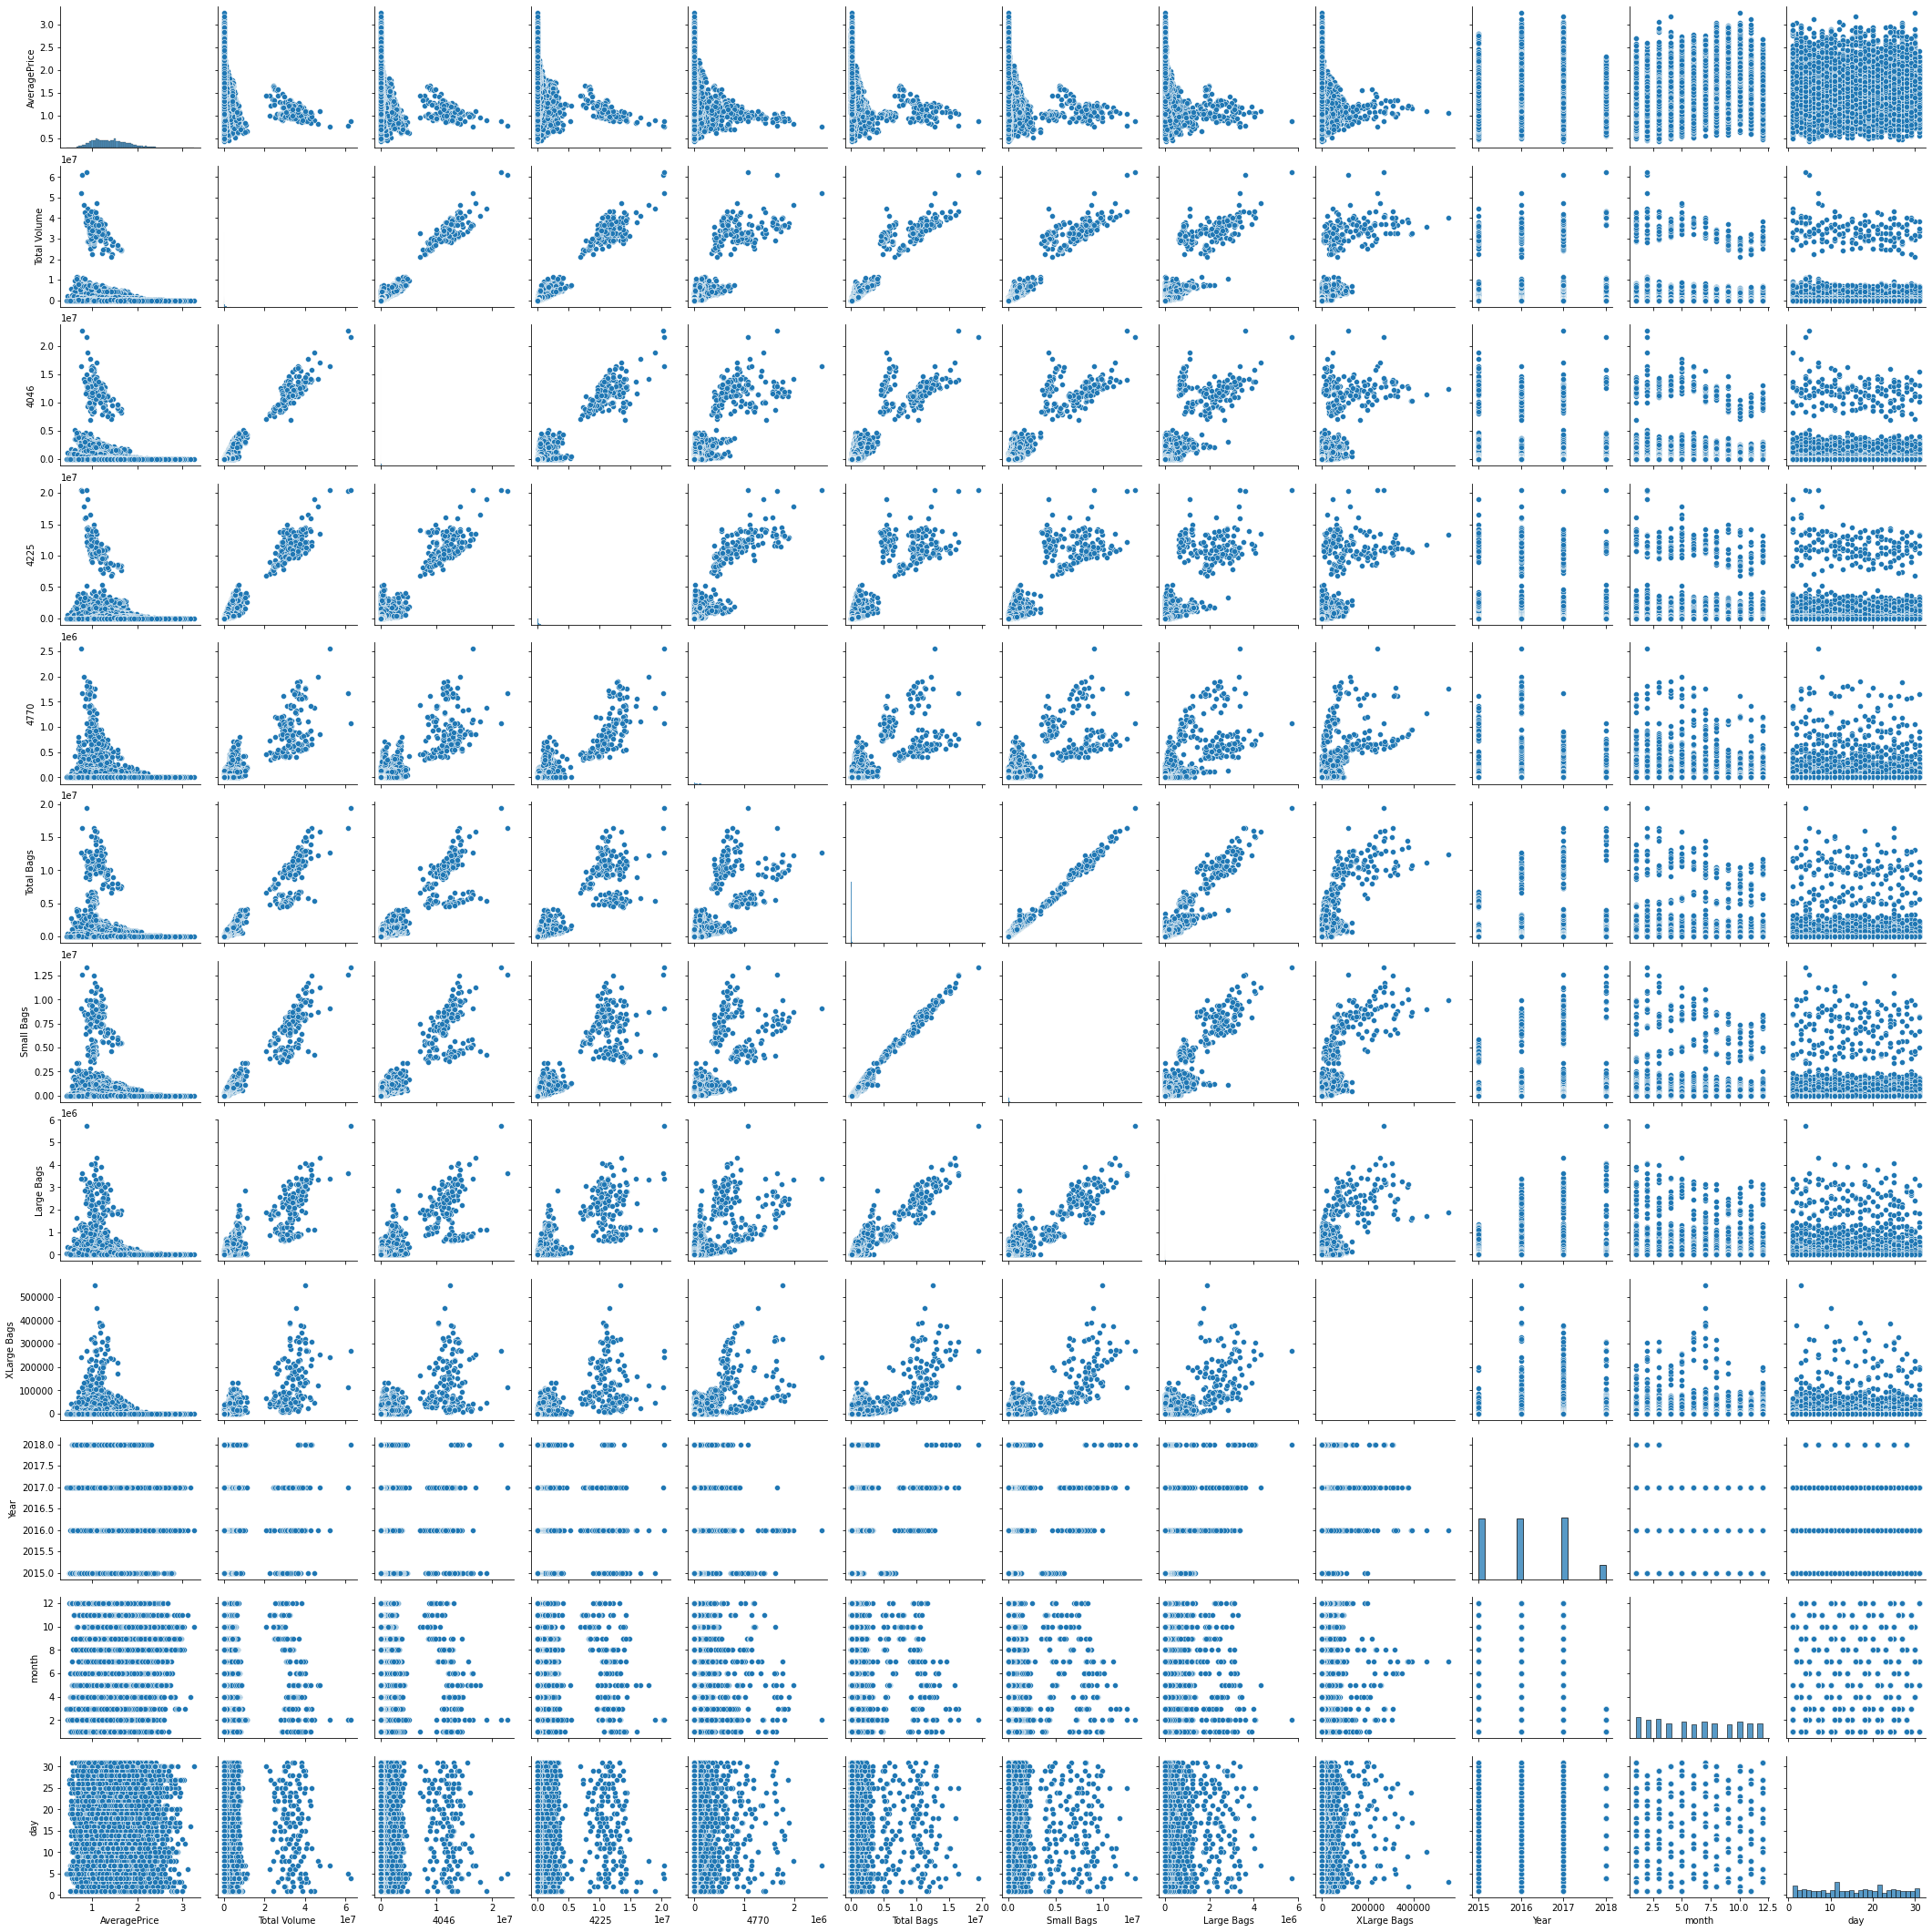

In [303]:
sns.pairplot(df)

In [304]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,month,day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,2015,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,2015,11,29


In [305]:
y=df.drop([Total Volume', '4046', '4225', '4770','Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year','region'], axis = 1)
y

SyntaxError: invalid syntax (Temp/ipykernel_28116/4153985947.py, line 1)

In [ ]:
x=df.drop(['AveragePrice'], axis = 1)
x

In [ ]:
oe=OrdinalEncoder()
df['type']=oe.fit_transform(df['type'].values.reshape(-1,1))
df

With the help of ordinalEncoder we have changed some object data to numric data as machine learning dont processed with object type data

In [ ]:
threashold=3
print(np.where(z>3))

In [ ]:
df_new=df[(z<3).all(axis=1)]

In [ ]:
df.shape,df_new.shape,
(18249-17931)/18249*100

In [ ]:
scale=StandardScaler()

In [ ]:
#Train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=.25,random_state=672)

In [ ]:
x_train.shape

In [ ]:
y_train.shape

In [ ]:
x_test.shape

In [ ]:
y_test.shape

## Thank you